In [1]:
import torch
import torch.nn as nn

import pandas as pd
import matplotlib.pyplot as plt

import random

def generate_real():
    real_data = torch.FloatTensor([
        9 + random.uniform(-0.1, 0.1),
        8 + random.uniform(-0.1, 0.1),
        1 + random.uniform(-0.1, 0.1),
        0 + random.uniform(-0.1, 0.1),
        2 + random.uniform(-0.1, 0.1),
        3 + random.uniform(-0.1, 0.1)
    ])
    return real_data

In [2]:
generate_real()

tensor([ 9.0508,  7.9281,  1.0243, -0.0524,  2.0977,  2.9382])

In [3]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(6, 3),
            nn.Sigmoid(),
            nn.LayerNorm(3),
#             nn.LeakyReLU(0.02),
            nn.Linear(3, 3),
            nn.Sigmoid(),
#             nn.LayerNorm(3),
#             nn.Linear(3, 3),
#             nn.Sigmoid(),
            nn.LayerNorm(3),
            nn.Linear(3, 1),
            nn.Sigmoid()
#             nn.LeakyReLU(0.02)
        )
#         self.loss_function = nn.MSELoss()
        self.loss_function = nn.BCELoss()
#         self.optimiser = torch.optim.SGD(self.parameters(), lr = 0.005)
        self.optimiser = torch.optim.Adam(self.parameters(), lr = 0.001)
        self.counter = 0
        self.progress = []
        pass
    
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns = ['loss'])
        df.plot(ylim = (0, 1.0), figsize = (16, 8), alpha = 0.1, marker = '.', grid = True, yticks = (0, 0.25, 0.5))
        pass

In [4]:
def generate_random(size):
    random_data = torch.rand(size) * 10
    return(random_data)

In [5]:
D = Discriminator()

for i in range(10000):
    D.train(generate_real(), torch.FloatTensor([1.0]))
    D.train(generate_random(6), torch.FloatTensor([0.0]))
    pass

counter =  10000
counter =  20000


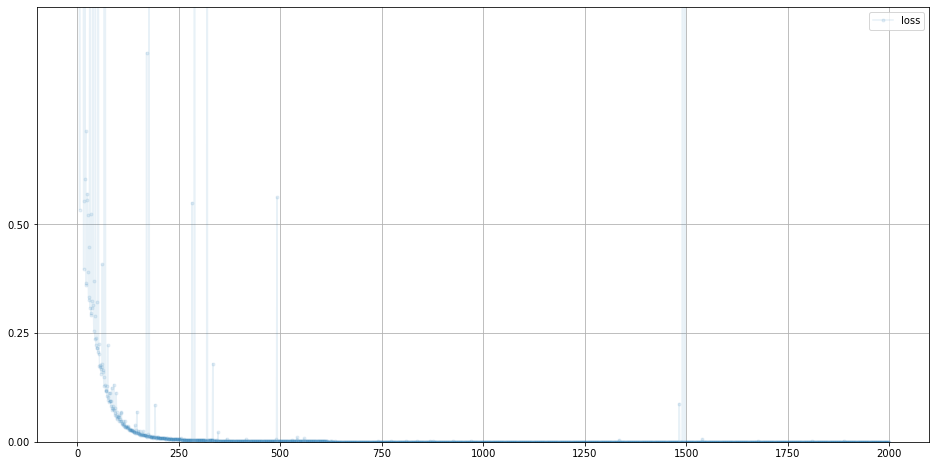

In [6]:
D.plot_progress()

In [7]:
print(D.forward(generate_real()).item())
print(D.forward(generate_random(6)).item())

0.9999103546142578
1.895128116302658e-05


In [8]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 3),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(3),
            nn.Linear(3, 3),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(3),
            nn.Linear(3, 3),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(3),
            nn.Linear(3, 6),
            nn.LeakyReLU(0.02)
        )
#         self.optimiser = torch.optim.SGD(self.parameters(), lr = 0.01)
        self.optimiser = torch.optim.Adam(self.parameters(), lr = 0.01)
        self.counter = 0
        self.progress = []
        pass
    
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)
        d_output = D.forward(g_output)
        loss = D.loss_function(d_output, targets)
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns = ['loss'])
        df.plot(ylim = (0, 1.0), figsize = (16, 8), alpha = 0.1, marker = '.', grid = True, yticks = (0, 0.25, 0.5))
        pass

In [9]:
G = Generator()
G.forward(torch.FloatTensor([0.5]))

tensor([-0.0132, -0.0002, -0.0112, -0.0135, -0.0083, -0.0178],
       grad_fn=<LeakyReluBackward0>)

In [10]:
D = Discriminator()
G = Generator()

image_list = []

for i in range(100000):
    D.train(generate_real(), torch.FloatTensor([1.0]))
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))
    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))
    if (i % 100 == 0):
        image_list.append(G.forward(torch.FloatTensor([0.5])).detach().numpy())
    pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
counter =  190000
counter =  200000


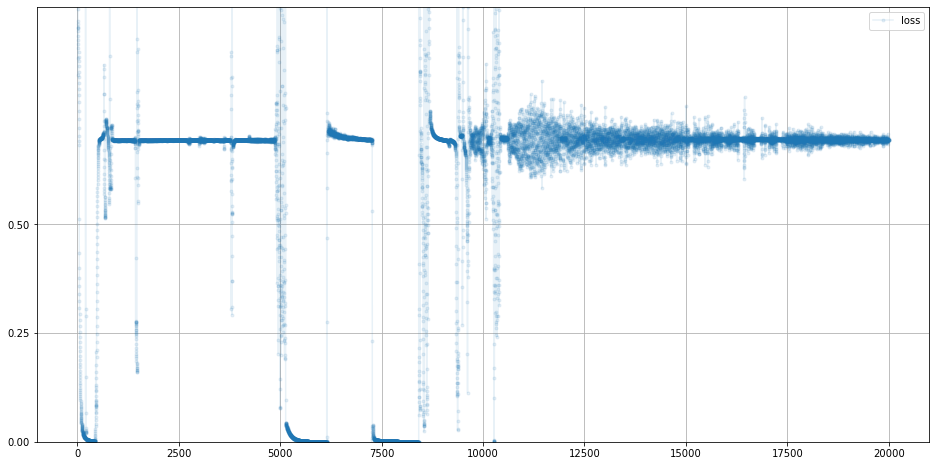

In [11]:
D.plot_progress()

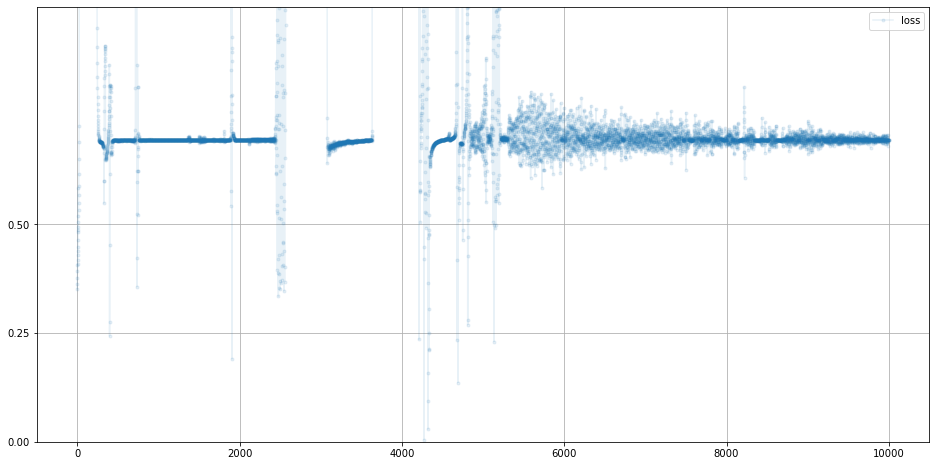

In [12]:
G.plot_progress()

In [13]:
G.forward(torch.FloatTensor([0.5]))

tensor([ 8.4942e+00,  7.6827e+00,  6.6055e-01, -5.9093e-03,  2.0644e+00,
         3.6402e+00], grad_fn=<LeakyReluBackward0>)

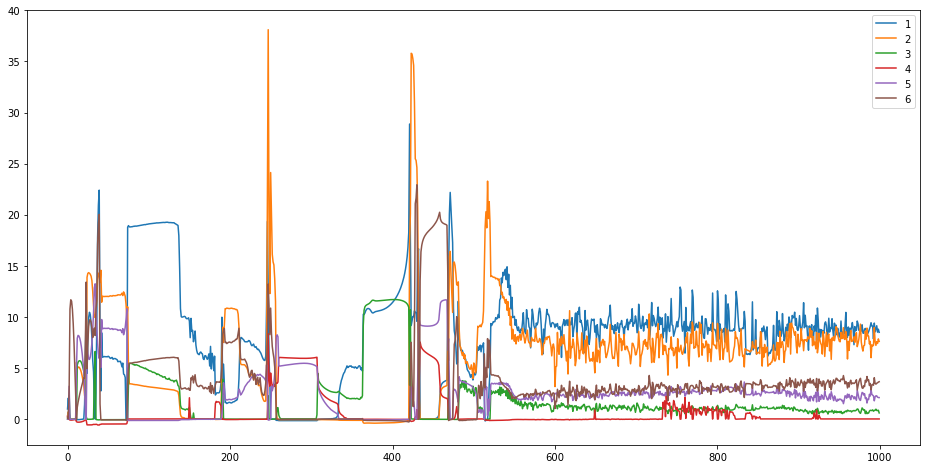

In [14]:
import numpy as np

plt.figure(figsize = (16, 8))
# plt.imshow(np.array(image_list).T, interpolation = 'none', cmap = 'Blues')
for i in range(6):
    plt.plot(np.array(image_list).T[i,:])

plt.legend(("1", "2", "3", "4", "5", "6"))